# ETRUCTURA DE DATOS Y ANALISIS DE ALGORITMOS
# Ordenamiento topologico de un grafo

## Librerias

In [71]:
import math
import matplotlib.pyplot as plt
import networkx as nx

## Clase Nodo

In [72]:
class Nodo:
    def __init__(self,nombre,x,y):
        self.nombre = nombre
        self.x = x
        self.y = y
        self.adyacentes = []

## Estructuras de datos iniciales

In [141]:
grafo = {
    6 : {5},
    5 : {},
    4 : {5},
    3 : {5},
    2 : {3 , 4},
    1 : {2 , 3 , 6}
}

# muestra [1, 2, 3, 4, 6, 5]

In [145]:
grafo = {
    1 : {2 , 3 , 6},
    2 : {3 , 4},
    3 : {5},
    4 : {5},
    5 : {},
    6 : {5}
}

# muestra  [1, 6, 2, 4, 3, 5]

In [146]:
G = nx.DiGraph()

for i in grafo:
    x = grafo[i]
    for j in x:
        G.add_edge(i,j)

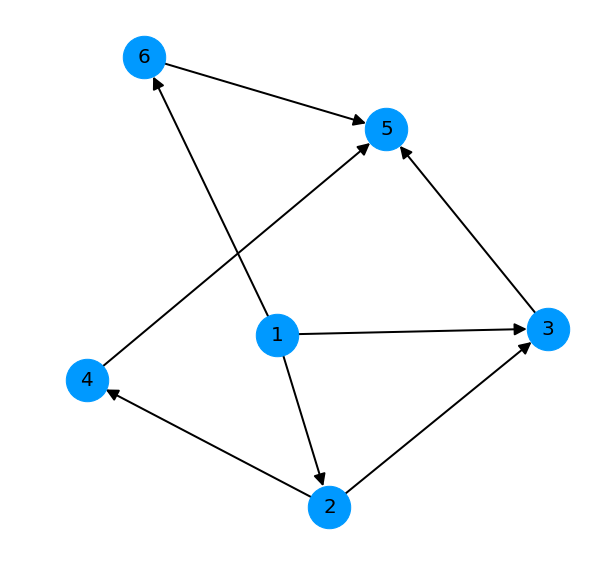

In [147]:
pos =  nx.spring_layout(G)
plt.figure(figsize = (10,10))
nx.draw_networkx_edges(G, pos, node_size=1800, width=2, arrowsize=25)
nx.draw_networkx_nodes(G, pos, node_size=1800, node_color =  (0, 0.6, 1))
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.axis("off")
plt.show()

In [148]:
def visitar(u,estado,lista):
    estado[u] = True
    for v in grafo[u]:
        if(estado[v] == False):
            visitar(v,estado,lista)
            print(u)
    estado[u] = -1
    lista.insert(0,u)

In [149]:
def ordenamiento_topologico(grafo, lista):
    estado = {}
    for u in grafo:
        estado[u] = False
    for u in grafo:
        if( estado[u] == False):
            visitar(u,estado,lista)

In [150]:
lista = []
ordenamiento_topologico(grafo,lista)
print(lista)

3
2
2
1
1
[1, 6, 2, 4, 3, 5]
